<a href="https://colab.research.google.com/github/DanielCavilla/LRD/blob/main/Lexical_Restrictions_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Construcción del corpus de predicados y argumentos

El corpus que utilizaremos se compone de lemas extraídos de *Redes: diccionario combinatorio del español contemporáneo* (en su edición de 2010). Se trata de un diccionario de diccionarios que contiene seis lemas vinculados a sus clases léxicas y argumentos correspondientes, con los cuales los predicados pueden combinarse en los textos. Dicho esto, cabe señalar que los predicados y argumentos están codificados como expresiones regulares, ya que ―como se sabe― en los enunciados estas unidades aparecen flexionadas en lugar de en su forma prototípica. Así pues, este formato nos permite identificar las distintas variantes flexivas de estos elementos léxicos y, en consecuencia, analizar las restricciones clasemáticas que se producen entre ellos.

In [ ]:
diccionario = {

    # Lema 1: 'abarrotado'
    '^abarrotad[oa](s)?$': {'sust_lugares_cerrados': ['^recintos?$', '^bar(es)?$', '^salas?$'],
                           'sust_lugares_abiertos':['^plazas?$', '^playas?$', '^pistas?$'],
                           'sust_vehículos': ['^autob[úu]s(es)?$','^tren(es)?$', '^coches?$'],
                           'sust_recipientes_contenedores': ['^ba[úu]l(es)?$', '^maletas?$', '^armarios?$', '^archivos?$'],
                           'sust_eventos_públicos': ['^sesi[óo]n(es)?$','^actos?$', '^conferencias?$','^exposici[óo]n(es)?$', '^fiestas?$', '^ferias?$'],
                           'sust_obras_componentes': ['^películas?$','^novelas?$','^comedias?$','^composici[óo]n(es)?$','^artículos?$', '^gui[óo]n(es)?$','^argumentos?$', '^fábulas?$'],
                           'sust_cursos_tiempos': ['^vidas?$', '^carreras?$', '^noches?$', '^calendarios?$', '^tiempos?$', '^futuros?$'],
                           'sust_personas_individuales_colectivos': ['^equipos?$', '^comunidad(es)?$', '^cineastas?$'],
                           'sust_otros_usos_estilísticos': ['^im[aá]gen(es)?$', '^amor(es)?$']},

    # Lema 2: 'catastrófico'
    '^catastrófic[oa](s)?$': {'sust_temporales': ['^años?$', '^temporadas?$', '^otoños?$'],
                              'sust_eventos': ['^negocios?$', '^partidos?$', '^viajes?$', '^excursi[óo]n(es)?$', '^dimisi[óo]n(es)?$'],
                              'sust_situación_estado': ['^escenarios?$', '^panoramas?$', '^coyunturas?$'],
                              'sust_ resultados_actividades': ['^novelas?$', '^edificios?$', '^ex[aá]men(es)?$', '^entrevistas?$'],
                              'sust_acontecimientos': ['^hechos?$', '^experiencias?$', '^casos?$'],
                              'sust_resultados_efectos': ['^consecuencias?$', '^efectos?$', '^resultados?$', '^derrotas?$', '^fracasos?$', '^repercusi[óo]n(es)?$', '^balances?', '^final(es)?'],
                              'sust_eventos_negativos': ['^terremotos?$', '^inundaci[óo]n(es)?$', '^lluvias?$', '^sequías?$', '^incendios?$', '^daños?$', '^enfermedad(es)?$', '^hambrunas?$', '^accidentes?$', '^explosi[óo]n(es)?$', '^choques?$', '^impactos?$', '^temblor(es)?$', '^seísmos?$', '^avalanchas?$'],
                              'sust_enfrentamientos': ['^guerras?$', '^enfrentamientos?$', '^luchas?$', '^divorcios?$'],
                              'sust_resolución_desenlace': ['^decisi[óo]n(es)?$', '^soluci[óo]n(es)?$', '^salidas?$'],
                              'sust_actuación_gestión': ['^gesti[óo]n(es)?$', '^políticas?$', '^sistemas?$', '^actuaci[óo]n(es)?$', '^actividad(es)?$', '^prácticas?$', '^improvisaci[oó]n(es)?$', '^apuestas?$'],
                              'sust_acción_equivocada': ['^error(es)?$', '^equivocaci[óo]n(es)?$', '^fallos?$', '^fallas?$'],
                              'sust_cambios': ['^evoluci[óo]n(es)?$', '^marchas?$', '^cambios?$', '^caídas?$', '^devaluaci[óo]n(es)?$', '^aumentos?$', '^incrementos?$', '^ampliaci[óo]n(es)?$'],
                              'sust_predicciones': ['^expectativa(s)?$', '^perspectivas?$', '^pronósticos?$', '^augurios?$', '^predicci[óo]n(es)?$','^profecías?$'],
                              'sust_estimativos': ['^actitud(es)?$', '^visi[óo]n(es)?$', '^concepci[oó]n(es)?$', '^análisis$', '^juicios?$', '^cosmovisi[óo]n(es)?$']},

    # Lema 3: 'desobecer'
    '^desobedec(?:er(?:[íaéíó]s?|emos|éis|en|án|ía|ías|íamos|íais)|z(?:co|cas|ca|camos|cáis|can)|í(?:semos|ramos)|(?:iste|ió|ieron|isteis|imos)|é|á|éremos|éreis|erais|eseis|iese|iere)$|^desobedeciendo$|^desobedecido$':
                              {'sust_personas_instituciones': ['^(a )?(las? |unas? )?autoridad(es)?$','^(al? )?(los |un(os)? )?gobiernos?$','^(las? |unas? )?direcci[óo]n(es)?$',
                                                               '^(al? )?(los |un(os)? )?tribunal(es)?$','^(al? )?(los |un(os)? )?jue[z|c](es)?$','^(al? )?(los |un(os)? )?padres?$',
                                                               '^(al? )?(los |un(os)? )?profesor(es)?$','^(al? )?(los |un(os)? )?presidentes?$','^(al? )?(los |un(os)? )?jefes?$'],
                               'sust_regulación': ['^(las? |unas? )?ley(es)?$','^(las? |unas? )?reglas?$','^(las? |unas? )?normas?$','^(las? |unas? )?directri(z|ces)$',
                                                   '^(el |los |un(os)? )?reglamentos?$','^(las? |unas? )?normativas?$','^(las? |unas? )?legislaci[óo]n(es)?$','^(las? |unas? )?ordenanzas?$',
                                                   '^(el |los |un(os)? )?preceptos?$','^(las? |unas? )?disposici[óo]n(es)?$','^(las? |unas? )?medidas?$'],
                               'sust_disposiciones_declaraciones': ['^(las? |unas? )?[óo]rden(es)?$','^(el |los |un(os)? )?mandatos?$','^(las? |unas? )?instrucci[óo]n(es)?$',
                                                                    '^(las? |unas? )?consignas?$','^(el |los |un(os)? )?pronunciamientos?$','^(el |los |un(os)? )?criterios?$','^(el |los |un(os)? )?bandos?$'],
                               'sust_resolución': ['^(las? |unas? )?sentencias?$','^(las? |unas? )?resoluci[óo]n(es)?$','^(el |los |un(os)? )?fallos?$','^(el |los |un(os)? )?acuerdos?$','^(las? |unas? )?decisi[óo]n(es)?$'],
                               'sust_detención': ['^(las? |unas? )?prohibici[óo]n(es)?$','^(las? |unas? )?suspensi[óo]n(es)?$','^(el |los |un(os)? )?boicots?$','^(el |los |un(os)? )?embargos?$'],
                               'sust_solicitud': ['^(el |los |un(os)? )?requerimientos?$','^(las? |unas? )?petici[óo]n(es)?$','^(el |los |un(os)? )?llamamientos?$','^(el |los |un(os)? )?llamados?$'],
                               'sust_sugerencia': ['^(el |los |un(os)? )?consejos?$','^(las? |unas? )?recomendaci[óo]n(es)?$','^(las? |unas? )?advertencias?$'],
                               'sust_otros_usos_estilísticos': ['^(el |los |un(os)? )?sinos?$','^(las? |unas? )?realidad(es)?$'],
                               'adv_otros_usos': ['^abiertamente$','^impunemente$','^reiteradamente$']},

    # Lema 4: 'encarar'
    '^encar(o|ar|ando|ad[oa]s?|ad|[oaéeíáó](n|ste(is)?|s|mos|is|ba(?:n|s|mos|is)?|se(?:n|s)?|[oaéeíáó]r[éeía]?[ns]?|ron)?)$':
                              {'sust_seres_vivos': ['^(con )?(el |los |un(os)? )?toros?$', '^(con )?(el |los |un(os)? )?porteros?$'],
                               'sust_objetos_lugares': ['^(las? |unas? )?porterías?$', '^(las? |unas? )?plazas?$'],
                               'sust_temporales_prospectivos': ['(el |los |un(os)? )?futuros?$', '^(las? |un(os)? )?legislaturas?$'],
                               'sust_curso_trayecto':['^(las? |unas? )?vidas?$', '^(el |los |un(os)? )?caminos?$', '^(el |los |un(os)? )?cursos?$', '^(las? |unas? )?carreras?$'],
                               'sust_eventos_importantes': ['^(el |los |un(os)? )?partidos?$','^(las? |unas? )?bodas?$'],
                               'sust_meteorología_clima': ['^(las? |unas? )?olas?$', '^(las? |unas? )?nevadas?$', '^(el |los |un(os)? )?vientos?$','^(el |los |un(os)? )?vendaval(es)?$'],
                               'sust_manifestaciones_comunicativas_género': ['^(las? |unas? )?respuestas?$', '^(las? |unas? )?acusaci[óo]n(es)?$', '^(las? |unas? )?críticas?$',
                                                                             '^(el |los |un(os)? )?reportaj(es)?$', '^(las? |unas? )?entrevistas?$'],
                               'sust_sentimientos_negativos': ['^(las? |unas? )?penas?$', '^(las? |unas? )?decepci[óo]n(es)?$', '^(las? |unas? )?necesidad(es)?$', '^(el |los |un(os)? )?sufrimientos?$',
                                                               '^(el |los |un(os)? )?suplicios?$', '^(las? |unas? )?tribulaci[óo]n(es)?$', '^(el |los |un(os)? )?dramas?$'],
                               'sust_personas_agrupaciones_instituciones': ['^(con )?(el |los |un(os)? )?rival(es)?$, ^(con )?(el |los |un(os)? )?reporteros?$', '^(con )?(el |los |un(os)? )?agresor(es)?$',
                                                                            '^(con )?(el |los |un(os)? )?gobiernos?$', '^(con )?(las? |unas? )?judicaturas?$'],
                               'sust_modificación': ['^(el |los |un(os)? )?cambios?$', '^(las? |unas? )?reformas?$', '^(las? |unas? )?transformaci[óo]n(es)?$', '^(las? |unas? )?adecuaci[óo]n(es)?$',
                                                     '^(las? |unas? )?renovaci[óo]n(es)?$', '^(las? |unas? )?reestructuraci[óo]n(es)?$', '^(las? |unas? )?restauraci[óo]n(es)?$', '^(las? |unas? )?reconversi[óo]n(es)?$'],
                               'sust_aspiración': ['^(las? |unas? )?metas?$', '^(el |los |un(os)? )?objetivos?$', '^(el |los |un(os)? )?retos?$', '^(el |los |un(os)? )?desafíos?$','^(las? |unas? )?reivindicaci[óo]n(es)?$',
                                                   '^(las? |unas? )?solicitud(es)?$', '^(las? |unas? )?horizontes?$', '^(las? |unas? )?perspectivas?$'],
                               'sust_recorrido': ['^(el |los |un(os)? )?viajes?$', '^(las? |unas? )?giras?$', '^(el |los |un(os)? )?rumbos?$'],
                               'sust_peligro_agresión': ['^(las? |unas? )?amenazas?$', '^(el |los |un(os)? )?aventuras?$', '^(el |los |un(os)? )?riesgos?$', '^(el |los |un(os)? )?ataques?$',
                                                         '^(las? |unas? )?presi[óo]n(es)?$', '^(las? |unas? )?embestidas?$'],
                               'sust_dificultad':['^(las? |unas? )?polémicas?$', '^(el |los |un(os)? )?problemas?$', '^(el |los |un(os)? )?dilemas?$'],
                               'sust_comunicación': ['^(el |los |un(os)? )?debat(es)?$', '^(el |los |un(os)? )?diálogos?$'],
                               'sust_búsqueda_examen': ['^(las? |unas? )?investigaci[óo]n(es)?$','^(el |los |un(os)? )?análisis$', '^(las? |unas? )?búsquedas?$'],
                               'sust_causa_origen': ['^(las? |unas? )?causas?$', '^(el |los |un(os)? )?motivos?$', '^(las? |unas? )?ra(íz|ices)$'],
                               'sust_obligación': ['^(el |los |un(os)? )?compromisos?$', '^(las? |unas? )?responsabilidad(es)?$', '^(las? |unas? )?obligaci[óo]n(es)?$'],
                               'sust_posible_idea': ['^(las? |unas? )?posibilidad(es)?$', '^(las? |unas? )?hipótesis$', '^(las? |unas? )?iniciativas?$'],
                               'adv_loc_otros_usos': ['^a fondo$', '^con arrojo$', '^con decisión$', '^con éxito$', '^con firmeza$', '^con valentía$', '^frontalmente$', '^valientemente$']},

    # Lema 5: 'ignorancia'
    '^(las? |unas? )?ignorancias?$': {'adj_ignorancia': ['^absolutas?$', '^completas?$', '^crasas?$', '^gran(de)?s?$', '^graves?$', '^inexcusables?$', '^patentes?$', '^perfectas?$', '^pertina[cz](es)?$', '^profundas?$', '^supinas?$', '^puras?$', '^simples?$', '^total(es)?$'],
                                      'sn_ignorancia': ['^grados? de$', '^pozos? de$', '^pruebas? de$', '^víctimas? de$'],
                                      'vb_ignorancia': ['^aduc(?:ir(?:[íaéíó]s?|emos|[íéá]is|[aeá]n|ía|ías|íamos|íais)|z(?:co|cas|ca|camos|cáis|can)|(?:iste|[óa]|eron|isteis|imos)|é|[áe]|[áe]remos|[áe]reis|erais|eseis|ese|ere)$|^aduciendo$|^aducido$',
                                                        '^aleg(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|ué|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are)$|^alegando$|^alegado$',
                                                        '^aprovech(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad|en)$|^aprovechando$|^aprovechado$',
                                                        '^combat(?:ir(?:[íaéíó]s?|emos|[íéá]is|[aeá]n|ía|ías|íamos|íais)|(?:iste|i[óa]|ieron|isteis|imos)|[áe]|[áe]remos|[áe]reis|(?:ier|ies)a[sn]?|i[ée]ramos|ierais|iesen?|iere[sn]?|i[ée]remos|iereis|id|an?)$|^combatiendo$|^combatido$',
                                                        '^demostr(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad)$|^demuest(?:r(?:[aeáéó][sn]?|en?)|o)$|^demostrando$|^demostrado$',
                                                        '^est(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|uv(?:iste|o|ieron|isteis|imos)|[áe]|[áe]remos|[áe]reis|uviera[sn]?|uv[ié]ramos|uvierais|uviese[sn]?|uvi[ée]semos|uvieseis|uviere[sn]?|uvi[ée]remos|uviereis|[áa]|[áe]n|ad)$|^estando$|^estado$',
                                                        '^fing(?:ir(?:[íaéíó]s?|emos|[íéá]is|[aeá]n|ía|ías|íamos|íais)|(?:iste|i[óa]|ieron|isteis|imos)|[áe]|[áe]remos|[áe]reis|(?:ier|ies)a[sn]?|i[ée]ramos|ierais|iesen?|iere[sn]?|i[ée]remos|iereis|id|an?)$|^finj(?:[aeáéó][sn]?|en?|o)$|^fingiendo$|^fingido$',
                                                        '^luch(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad|en)$|^luchando$|^luchado$',
                                                        '^manifi?est(?:[aeáéó][sn]?|en?|o)|^manifest(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad)$|^manifestando$|^manifestado$',
                                                        '^mostr(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad)|^muest(?:r(?:[aeáéó][sn]?|en?)|o)$|^mostrando$|^mostrado$',
                                                        '^reconoz(?:c(?:[aeáéó][sn]?|en?|o)|(?:[íaéíó]s?|emos|[íéá]is|[aeá]n|ía|ías|íamos|íais))|^recon(?:oc(?:er(?:ía[sn]?|[íé]amos|íais|[aeá]n|emos|[éá]is)?|(?:iste|i[óa]|ieron|isteis|imos)|iera[sn]?|i[ée]ramos|ierais|iese[sn]?|i[ée]semos|ieseis|iere[sn]?|i[ée]remos|iereis|ed|iendo|ido)|[óo]zc(?:[aeáéó][sn]?|o|en?))$',
                                                        '^redim(?:ir(?:[íaéíó]s?|emos|[íéá]is|[aeá]n|ía|ías|íamos|íais)|(?:iste|i[óa]|ieron|isteis|imos)|[áe]|[áe]remos|[áe]reis|(?:ier|ies)a[sn]?|i[ée]ramos|ierais|iesen?|iere[sn]?|i[ée]remos|iereis|id|an?)$|^redimiendo$|^redimido$',
                                                        '^rescat(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad|en)$|^rescatando$|^rescatado$',
                                                        '^revel(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad|en)$|^revelando$|^revelado$',
                                                        '^sum(?:ir(?:[íaéíó]s?|emos|[íéá]is|[aeá]n|ía|ías|íamos|íais)|(?:iste|i[óa]|ieron|isteis|imos)|[áe]|[áe]remos|[áe]reis|(?:ier|ies)a[sn]?|i[ée]ramos|ierais|iesen?|iere[sn]?|i[ée]remos|iereis|id|an?)$|^sumiendo$|^sumido$',
                                                        '^trasluc(?:ir(?:ía[sn]?|[íé]amos|íais|[aeá]n|emos|[éá]is)?(?:iste|i[óa]|ieron|isteis|imos)|iera[sn]?|i[ée]ramos|ierais|iese[sn]?|i[ée]semos|ieseis|iere[sn]?|i[ée]remos|iereis|id|iendo|ido)$']},

    # Lema 6: 'juventud'
    '^(las? |unas? )?juventud(es)?$': {'adj_juventud': ['^añoradas?$', '^conflictivas?$', '^doradas?$', '^lozanas?$', '^plenas?$', '^rebeldes?$'],
                                       'vb_juventud': ['^evoc(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad)|^evoqu(?:[eéó][sn]?|en?|o)$|^evocando$|^evocado$',
                                            '^goz(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad|en)$|^gozando$|^gozado$',
                                            '^luz(?:c(?:[aeáéó][sn]?|en?|o)|(?:[íaéíó]s?|emos|[íéá]is|[aeá]n|ía|ías|íamos|íais))$|^luc(?:ir(?:ía[sn]?|[íé]amos|íais|[aeá]n|emos|[éá]is)?|(?:iste|i[óa]|ieron|isteis|imos)|iera[sn]?|i[ée]ramos|ierais|iese[sn]?|i[ée]semos|ieseis|iere[sn]?|i[ée]remos|iereis|id|iendo|ido)$',
                                            '^malgast(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad|en)$|^malgastando$|^malgastado$',
                                            '^marchit(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad|en)$|^marchitando$|^marchitado$',
                                            '^pas(?:ar(?:[íaéíó]s?|emos|[áé]is|[aeá]n|aba[sn]?|[áa]bamos|abais|ía|ías|íamos|íais)|(?:aste|[óa]|aron|asteis|amos)|é|[áe]|[áe]remos|[áe]reis|arais|aseis|ase|are|ad|en)$|^pasando$|^pasado$',
                                            '^pierd(?:[aeáéó][sn]?|en?|o)|^perd(?:er(?:[íaéíó]s?|emos|[éá]is|[aeá]n|ía[sn]?|[íé]amos|íais)?|(?:iste|i[óa]|ieron|isteis|imos)|iera[sn]?|i[ée]ramos|ierais|iese[sn]?|i[ée]semos|ieseis|iere[sn]?|i[ée]remos|iereis|ed|iendo|ido)$',
                                            '^reviv(?:ir(?:[íaéíó]s?|emos|[íéá]is|[aeá]n|ía|ías|íamos|íais)|(?:iste|i[óa]|ieron|isteis|imos)|[áe]|[áe]remos|[áe]reis|(?:ier|ies)a[sn]?|i[ée]ramos|ierais|iesen?|iere[sn]?|i[ée]remos|iereis|id|an?)$|^reviviendo$|^revivido$',
                                            '^viv(?:ir(?:[íaéíó]s?|emos|[íéá]is|[aeá]n|ía|ías|íamos|íais)|(?:iste|i[óa]|ieron|isteis|imos)|[áe]|[áe]remos|[áe]reis|(?:ier|ies)a[sn]?|i[ée]ramos|ierais|iesen?|iere[sn]?|i[ée]remos|iereis|id|an?)$|^viviendo$|^vivido$',
                                            '^vuelv(?:[aeáéó][sn]?|en?|o)|^volv(?:er(?:[íaéíó]s?|emos|[éá]is|[aeá]n|ía[sn]?|[íé]amos|íais)?|(?:iste|i[óa]|ieron|isteis|imos)|iera[sn]?|i[ée]ramos|ierais|iese[sn]?|i[ée]semos|ieseis|iere[sn]?|i[ée]remos|iereis|ed|iendo|ido)$']}

}

# 2. Análisis exploratorio del corpus

Una vez establecido el corpus, podemos convertir el diccionario de lemas en un cuadro de datos (*dataframe*) como paso opcional. A través de bibliotecas como *pandas*, *matplolib* y *seaborn*, podemos realizar diversos análisis exploratorios de nuestra muestra. De este modo, podríamos generar un diagrama de barras para visualizar con claridad y de manera rápida qué predicados del corpus tienen un mayor número de argumentos asociados y, consecuentemente, mayor extensión. Estos análisis proporcionan información valiosa sobre los posibles resultados. Por ejemplo, en términos generales, es más probable encontrar ocurrencias de restricciones léxicas del tipo más extenso cuando un predicado puede combinarse con menos argumentos que otro. Naturalmente, esto depende de otros factores como el tema del texto.

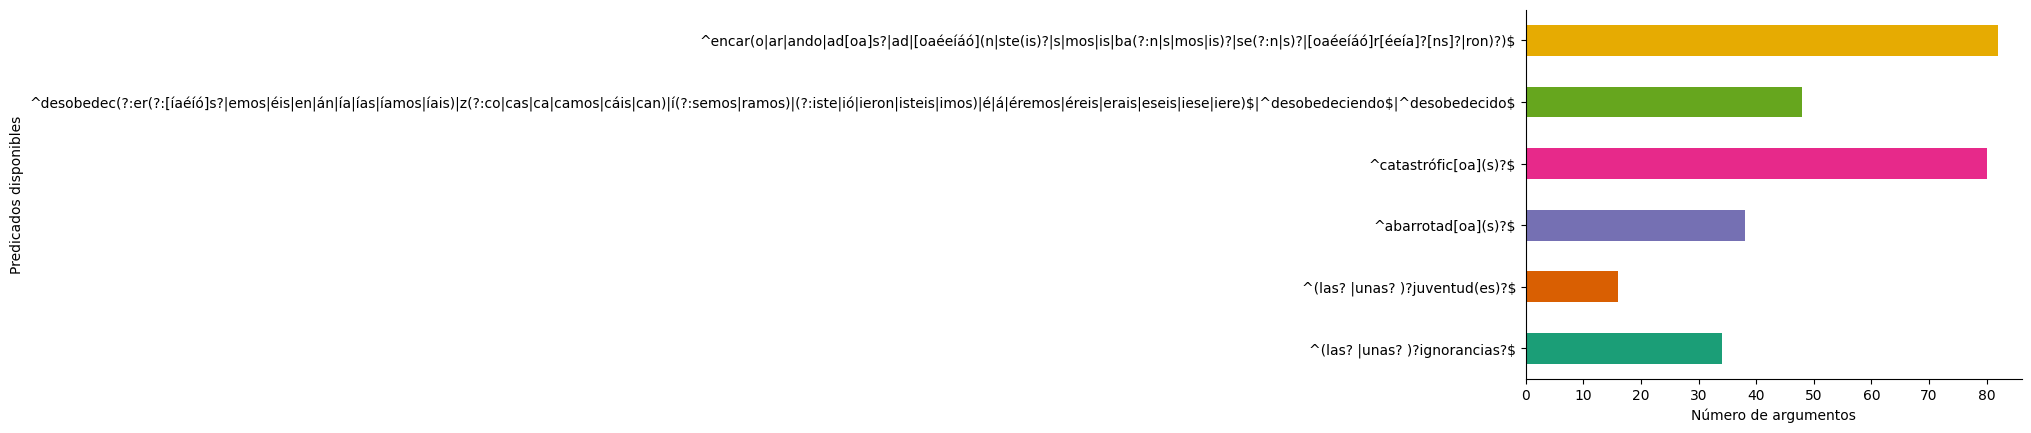

In [ ]:
import pandas as pd

# Aplanar el diccionario
filas = []
for predicado, clases in diccionario.items():
    for clase, argumentos in clases.items():
        for argumento in argumentos:
            filas.append({
                'predicados': predicado,
                'clases léxicas': clase,
                'argumentos': argumento})

# Crear el DataFrame
df = pd.DataFrame(filas)

# Generar un gráfico de barras horizontales
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('predicados').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Predicados disponibles')
plt.xlabel('Número de argumentos')
plt.show()

# 3. Función para preprocesar el texto a analizar

Como veremos, la función que emplearemos para identificar restricciones léxicas requerirá dos argumentos: un diccionario y un texto. En este sentido, cabe indicar que el texto debe estar limpio, es decir, sin elementos lingüísticamente irrelevantes que puedan interferir en el análisis, como signos de puntuación, números, espacios en blanco, etc. Para lograr esto, crearemos y aplicaremos una función de preprocesamiento que devuelva en forma de lista los que podríamos considerar tokens efectivos para nuestro estudio.

In [ ]:
def preprocesar_texto(texto):

    import re

    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar caracteres especiales y números
    texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)

    # Normalizar espacios en blanco
    texto = re.sub(r'\s+', ' ', texto)

    # Eliminar espacios al inicio y final
    texto = texto.strip()

    # Tokenizar el texto
    tokens = texto.split()

    return tokens

# 4. Función para identificar restricciones léxicas en un texto

Preparados los datos, la función final recorrerá las palabras del texto preprocesado y capturará el contexto lingüístico inmediato del predicado encontrado en el enunciado. A través de iteración, la función comprobará si en la secuencia capturada se encuentra alguno de los argumentos de las clases léxicas asociadas al lema en cuestión. Si es así, el programa considerará que ha hallado una restricción léxica y procederá a incluirla en la lista que devolverá como *output* al final de la ejecución. Cabe matizar que el programa no debería incluir en esta variable combinaciones léxicas donde aparezca un lema aislado o asociado a un argumento que no le corresponde; he aquí el carácter restrictivo que se ha pretendido dar a la función. Por ejemplo, si apareciese en un texto *error abarrotado*, la función no debería recoger este sintagma; sí lo debería hacer si *error* apareciese sintagmáticamente asociado a *catastrófico*. Asimismo, es importante destacar que la función solo detecta restricciones léxicas cuando sus elementos aparecen de manera contigua (únicamente permite palabras funcionales entre los componentes de la restricción). Por ejemplo, en el enunciado "La plaza estaba abarrotada", el programa no identificaría ninguna restricción, mientras que sí lo haría si apareciese directamente el sintagma *plaza abarrotada*. Obviamente, esta limitación podría corregirse mediante programación, de manera que la función capturara más contexto. No obstante, consideramos que el algoritmo desarrollado es ya adecuado para una primera aproximación y otras modificaciones supondrían complicar demasiado este experimento. Dicho esto, los detalles completos del razonamiento se pueden encontrar en el código fuente, que incluye comentarios explicativos para cada paso del proceso.

In [ ]:
def identificar_restricciones_léxicas (texto: list, diccionario: dict):

    """
    Identifica las restricciones léxicas que pudieran aparecer en un texto preprocesado.

    Argumentos:
        texto (list): El texto completo donde buscar las restricciones léxicas.
        diccionario (dict): El corpus de predicados y argumentos de restricciones léxicas.

    Resultado:
        lista (list): La función devuelve una lista con las restricciones léxicas encontradas.
    """

    # 1. Importar el módulo re
    import re

    # 2. Almacenar en una lista las posiciones de los predicados en el texto
    posiciones_predicados = [posición for posición, palabra in enumerate(texto) for predicado in diccionario if re.match(predicado, palabra)]

    # 3. Inicializar una lista vacía para almacenar las restricciones léxicas encontradas
    restricciones_léxicas= []

    # 4. Analizar posibles restricciones léxicas a partir de los predicados y sus contextos de aparición
    # 4.1. Iterar sobre las posiciones de los predicados encontrados
    for posición in posiciones_predicados:

        # 4.2. Iterar sobre los predicados del diccionario
        for predicado in diccionario:

            # 4.3. Comprobar si la ocurrencia del texto se corresponde con alguna de las claves correspondientes a los predicados
            if re.match(predicado, texto[posición]):

                # 4.4. Si la condición se cumple, iterar sobre las clases léxicas incluidas en el predicado que coincide con la ocurrencia
                for clase_léxica in diccionario[predicado]:

                    # 4.5. Iterar sobre los argumentos contenidos en las clases léxicas
                    for argumento in diccionario[predicado][clase_léxica]:

                        # 4.6. Analizar posibles restricciones léxicas de estructuras cuaternarias con el predicado en posición inicial
                        # 4.6.1. Verificar si el predicado se encuentra tres posiciones antes de los límites del texto
                        if posición <= (len(texto)-4):

                            # 4.6.2. Si la condición se cumple, guardar en una variable string las dos unidades léxicas que siguen directamente al predicado
                            ocurrencia= texto[posición+1]+' '+texto[posición+2]+' '+texto[posición+3]

                            # 4.6.3. Comprobar si estas tres unidades léxicas corresponden a alguno de los argumentos
                            if re.match(argumento, ocurrencia):

                                # 4.6.4. Si la condición se cumple, añadir las restricciones léxicas a la lista vacía
                                restricciones_léxicas.append(texto[posición]+' '+ocurrencia)

                        # 4.7. Analizar posibles restricciones léxicas de estructuras cuaternarias con el predicado en posición final
                        # 4.7.1. Almacenar en una variable de tipo string las dos unidades léxicas que anteceden inmediatamente al predicado
                        ocurrencia= texto[posición-2]+' '+texto[posición-1]

                        # 4.7.2. Comprobar si estas tres unidades léxicas corresponden a alguno de los argumentos
                        if re.match(argumento, ocurrencia):

                            # 4.7.3. Si la condición se cumple, añadir las restricciones léxicas a la lista vacía
                            restricciones_léxicas.append(ocurrencia+' '+texto[posición])

                        # 4.8. Analizar posibles restricciones léxicas de estructuras tripartitas con el predicado en posición inicial
                        # 4.8.1. Verificar si el predicado se encuentra tres posiciones antes de los límites del texto
                        if posición <= (len(texto)-3):

                            # 4.8.2. Si la condición se cumple, guardar en una variable string las dos unidades léxicas que siguen directamente al predicado
                            ocurrencia= texto[posición+1]+' '+texto[posición+2]

                            # 4.8.3. Comprobar si estas dos unidades léxicas corresponden a alguno de los argumentos
                            if re.match(argumento, ocurrencia):

                                # 4.8.4. Si la condición se cumple, añadir las restricciones léxicas a la lista vacía
                                restricciones_léxicas.append(texto[posición]+' '+ocurrencia)

                        # 4.9. Analizar posibles restricciones léxicas de estructuras tripartitas con el predicado en posición final
                        # 4.9.1. Almacenar en una variable de tipo string las dos unidades léxicas que anteceden inmediatamente al predicado
                        ocurrencia= texto[posición-2]+' '+texto[posición-1]

                        # 4.9.2. Comprobar si estas dos unidades léxicas corresponden a alguno de los argumentos
                        if re.match(argumento, ocurrencia):

                            # 4.9.3. Si la condición se cumple, añadir las restricciones léxicas a la lista vacía
                            restricciones_léxicas.append(ocurrencia+' '+texto[posición])

                        # 4.10. Analizar posibles restricciones léxicas de estructuras binarias con el predicado en posición incial
                        # 4.10.1. Verificar si el predicado se encuentra dos posiciones antes de los límites del texto
                        if posición <= (len(texto)-2):

                            # 4.10.2. Si la condición se cumple, guardar en una variable string la unidad léxica que sigue directamente al predicado
                            ocurrencia= texto[posición+1]

                            # 4.10.3. Comprobar si esta unidad léxica coincide con alguno de los argumentos
                            if re.match(argumento, ocurrencia):

                                # 4.10.4. Si la condición se cumple, añadir las restricciones léxicas a la lista vacía
                                restricciones_léxicas.append(texto[posición]+' '+ocurrencia)

                        # 4.11. Analizar posibles restricciones léxicas de estructuras binarias con el predicado en posición incial
                        # 4.11.1. Almacenar en una variable de tipo string la unidad léxica que antecede inmediatamente al predicado
                        ocurrencia= texto[posición-1]

                        # 4.11.2. Comprobar si esta unidad léxica coincide con alguno de los argumentos
                        if re.match(argumento, ocurrencia):

                            # 4.11.3. Si la condición se cumple, añadir las restricciones léxicas a la lista vacía
                            restricciones_léxicas.append(ocurrencia+' '+texto[posición])

    # 5. Eliminar posibles restricciones duplicadas
    restricciones_léxicas= list(set(restricciones_léxicas))

    # 6. Devolver el resultado
    return restricciones_léxicas

# 5. Pruebas

A continuación, se realizarán algunas pruebas para evaluar la eficacia del programa:

Texto 1: "La *fiesta abarrotada* del sábado pasado fue todo un acontecimiento. Una *juventud rebelde* se había congregado en el local para celebrar el final de los exámenes. Lo que comenzó como una noche prometedora se convirtió en una *experiencia catastrófica* cuando el equipo de sonido falló. En medio del caos, un estudiante *desobedeció a la autoridad* se *encaró con un portero* que impedía el paso a más gente. Su *profunda ignorancia* sobre las normas de convivencia casi provoca un incidente mayor".

In [ ]:
# Preprocesar el texto
cadena1= 'La fiesta abarrotada del sábado pasado fue todo un acontecimiento. Una juventud rebelde se había congregado en el local para celebrar el final de los exámenes. Lo que comenzó como una noche prometedora se convirtió en una experiencia catastrófica cuando el equipo de sonido falló. En medio del caos, un estudiante desobedeció a la autoridad y se encaró con un portero que impedía el paso a más gente. Su profunda ignorancia sobre las normas de convivencia casi provoca un incidente mayor.'
texto1= preprocesar_texto(cadena1)

# Aplicar la función
identificar_restricciones_léxicas (texto1, diccionario)

['encaró con un portero',
 'experiencia catastrófica',
 'juventud rebelde',
 'fiesta abarrotada',
 'profunda ignorancia',
 'desobedeció a la autoridad']

Texto 2: "Esa mañana estaba el *tren abarrotado* de gente y se dirigía hacia la ciudad mientras los *catastróficos pronósticos* sobre el temporal se cumplían uno tras otro. Los jóvenes pasajeros, que *desobedecieron reiteradamente* las advertencias de seguridad, encararon los riesgos con una mezcla de temeridad y arrogancia. Muchos de ellos, eran *víctimas de ignorancia* sobre los peligros reales y, por ello, *malgastaron su juventud* en decisiones precipitadas que más tarde lamentarían."

In [ ]:
# Preprocesar el texto
cadena2= 'Esa mañana estaba el tren abarrotado de gente y se dirigía hacia la ciudad mientras los catastróficos pronósticos sobre el temporal se cumplían uno tras otro. Los jóvenes pasajeros, que desobedecieron reiteradamente las advertencias de seguridad, encararon los riesgos con una mezcla de temeridad y arrogancia. Muchos de ellos, eran víctimas de ignorancia sobre los peligros reales y, por ello, malgastaron su juventud en decisiones precipitadas que más tarde lamentarían.'
texto2= preprocesar_texto(cadena2)

# Aplicar la función
identificar_restricciones_léxicas (texto2, diccionario)

['desobedecieron reiteradamente',
 'víctimas de ignorancia',
 'encararon los riesgos',
 'tren abarrotado',
 'catastróficos pronósticos']

Texto 3: "El viaje de verano se convirtió en una experiencia inolvidable, aunque no precisamente por motivos positivos. Todo comenzó en el aeropuerto, donde nos encontramos con las *maletas abarrotadas* de ropa innecesaria que nunca llegamos a usar. Lo que siguió fue un *viaje catastrófico* plagado de contratiempos: vuelos retrasados, reservas perdidas y un sinfín de inconvenientes. La situación empeoró cuando algunos pasajeros comenzaron a *desobedecer el reglamento* del aeropuerto, causando más demoras. Sin embargo, aprendimos a *encarar los problemas* con determinación y paciencia. Resultó evidente que algunos habían *fingido ignorancia* ante las normas básicas de conducta, y la *juventud conflictiva* de algunos viajeros solo contribuyó a empeorar la situación."

In [ ]:
# Preprocesar el texto
cadena3= 'El viaje de verano se convirtió en una experiencia inolvidable, aunque no precisamente por motivos positivos. Todo comenzó en el aeropuerto, donde nos encontramos con las maletas abarrotadas de ropa innecesaria que nunca llegamos a usar. Lo que siguió fue un viaje catastrófico plagado de contratiempos: vuelos retrasados, reservas perdidas y un sinfín de inconvenientes. La situación empeoró cuando algunos pasajeros comenzaron a desobedecer el reglamento del aeropuerto, causando más demoras. Sin embargo, aprendimos a encarar los problemas con determinación y paciencia. Resultó evidente que algunos habían fingido ignorancia ante las normas básicas de conducta, y la juventud conflictiva de algunos viajeros solo contribuyó a empeorar la situación.'
texto3= preprocesar_texto(cadena3)

# Aplicar la función
identificar_restricciones_léxicas (texto3, diccionario)

['viaje catastrófico',
 'maletas abarrotadas',
 'encarar los problemas',
 'juventud conflictiva',
 'fingido ignorancia']